# Proyecto Final Data Analysis

## Analisis comercial para América Móvil

## Objetivo: 

Realizar el análisis de la información comercial de América Móvil contenido para Claro Video con la finalidad de
    encontrar insights que nos ayuden a generar acciones y estrategias que ayuden al negocio.

## Información: 
 
 Se cuenta con un dataset que contiene información referente a los indicadores más importantes de dicha aplicacion
 para México y Lationamérica.

## Procedimiento

Lectura de los datos:

Lo primero que tenemos que hacer es importar las que ocuparemos: CSV, Numpy, Pandas y Matplotlib para leer nuestro archivo CSV y definirlo como nuestro dataframe.

In [15]:
#Importamos Numpy, pandas y matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

#Leemos el csv para convertirlo en nuestra variable que será nuestro dataframe
dfClaroVD = pd.read_csv('C:/Users/marti/Desktop/Python-Curso/Claro-Video.csv')
dfClaroVD.head()

c:\users\marti\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
0,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Fija,37,7.0,Crackle,NaN,NaN,web,Otros,Fija,M,web,El Salvador,2018/08/31,2018,AGOSTO
1,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Móvil,6,3.0,Crackle,NaN,NaN,tv,No Especificado,Móvil,M,tv,El Salvador,2018/08/31,2018,AGOSTO
2,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,41,2.0,Nog,NaN,NaN,NaN,No Especificado,Fija,M,0,El Salvador,2018/08/31,2018,AGOSTO
3,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,2,1.0,Nog,NaN,NaN,tablet,android,Fija,M,tablet,El Salvador,2018/08/31,2018,AGOSTO
4,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,4,1.0,Nog,NaN,NaN,tablet,Apple,Fija,M,tablet,El Salvador,2018/08/31,2018,AGOSTO


In [16]:
# Se utiliza la función shape para conocer el tamaño de nuestro dataframe

dfClaroVD.shape

(161355, 20)

In [14]:
# Con el atributo "count" podemos visualizar el número total de columnas así como el número de registros por cada una.
# Así podemos ver que no todas las columnas tienen el mismo número de registros y esto es debido a la forma de cubo que tiene
# nuestro dataframe.
dfClaroVD.count()

NOMBRE_METRICA                  161355
FECHA_INFO                      161355
PAIS                            161355
ABONO                           123899
SEMANA                          161166
MEDIO_PAGO_NOMBRE               143688
CANTIDAD                        161206
N_USUARIOS                      157047
canal                           149233
fecha_min                        17900
fecha_max                        17900
TX_DISP_CATEGORIA_ORIGINAL      128309
modelo                          133196
medio_pago_homologado           161355
tipo_reporte                    161355
TX_DISP_CATEGORIA_HOMOLOGADA    133196
País Homologado                 161355
FECHA                           161355
AÑO                             161355
MES                             161355
dtype: int64

In [26]:
# Usando dtypes podemos identificar el tipo de dato para cada variable
dfClaroVD.dtypes

NOMBRE_METRICA                   object
FECHA_INFO                        int64
PAIS                             object
ABONO                            object
SEMANA                          float64
MEDIO_PAGO_NOMBRE                object
CANTIDAD                         object
N_USUARIOS                      float64
canal                            object
fecha_min                       float64
fecha_max                       float64
TX_DISP_CATEGORIA_ORIGINAL       object
modelo                           object
medio_pago_homologado            object
tipo_reporte                     object
TX_DISP_CATEGORIA_HOMOLOGADA     object
País Homologado                  object
FECHA                            object
AÑO                               int64
MES                              object
dtype: object

In [72]:
dfClaroVD['CANTIDAD'].dtypes

dtype('O')

In [19]:
# Mediante "value_counts" analizamos la columna "NOMBRE_METRICA" que contiene las medidas mientras que las demás columnas
# nos indican las distintas dimensiones
pd.value_counts(dfClaroVD['NOMBRE_METRICA'])

Visualizaciones      133196
Bajas                 12328
Altas                  5572
Suscripciones          5012
Activos 30 días        1193
Rentas                  850
Stand Alone             577
Bundle                  577
Empaquetados            556
Universo                556
Periodo de Prueba       528
Usuarios Anónimos       320
Compras                  90
Name: NOMBRE_METRICA, dtype: int64

In [20]:
# Comenzaremos por analizar la metrica de visualizaciones que es una de las más importantes
# Filtramos este indicador y lo definimos como una nueva variable

visCV = dfClaroVD['NOMBRE_METRICA'] == 'Visualizaciones'
visCV.head()

0    True
1    True
2    True
3    True
4    True
Name: NOMBRE_METRICA, dtype: bool

In [21]:
Visualizaciones = dfClaroVD[visCV]
Visualizaciones.head()

,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
0,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Fija,37,7.0,Crackle,NaN,NaN,web,Otros,Fija,M,web,El Salvador,2018/08/31,2018,AGOSTO
1,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Móvil,6,3.0,Crackle,NaN,NaN,tv,No Especificado,Móvil,M,tv,El Salvador,2018/08/31,2018,AGOSTO
2,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,41,2.0,Nog,NaN,NaN,NaN,No Especificado,Fija,M,0,El Salvador,2018/08/31,2018,AGOSTO
3,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,2,1.0,Nog,NaN,NaN,tablet,android,Fija,M,tablet,El Salvador,2018/08/31,2018,AGOSTO
4,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,4,1.0,Nog,NaN,NaN,tablet,Apple,Fija,M,tablet,El Salvador,2018/08/31,2018,AGOSTO


In [22]:
# Podemos comprobar ahora el tamaño de la nueva variable
Visualizaciones.shape

(133196, 20)

In [93]:
Canok = Visualizaciones['CANTIDAD'].astype('float')
Paisok = Visualizaciones['PAIS']

In [176]:
NuevoDF = np.array([[Paisok], [Canok]])
NuevoDF = NuevoDF.T
NuevoDF

array([[['ELSALVADOR', 37.0]],

       [['ELSALVADOR', 6.0]],

       [['ELSALVADOR', 41.0]],

       ...,

       [['URUGUAY', 6.0]],

       [['URUGUAY', 408.0]],

       [['URUGUAY', 210.0]]], dtype=object)

In [211]:
Cantidades = pd.DataFrame(NuevoDF[:,0])
Cantidades.head(11)

,0,1
0,ELSALVADOR,37
1,ELSALVADOR,6
2,ELSALVADOR,41
3,ELSALVADOR,2
4,ELSALVADOR,4
5,ELSALVADOR,181
6,ELSALVADOR,4
7,ELSALVADOR,4
8,ELSALVADOR,165
9,ELSALVADOR,76


In [213]:
#pd.value_counts(Visualizaciones['PAIS'])
Cantidades.groupby([0]).sum() / 1000000
#Cantidades.groupby([0]).agg('sum') / 1000000

,1
0,
ARGENTINA,30.987839
BRASIL,17.000089
CHILE,12.726839
COLOMBIA,61.789713
COSTARICA,0.445212
DOMINICANA,1.042408
ECUADOR,5.622009
ELSALVADOR,4.402402
GUATEMALA,2.171281


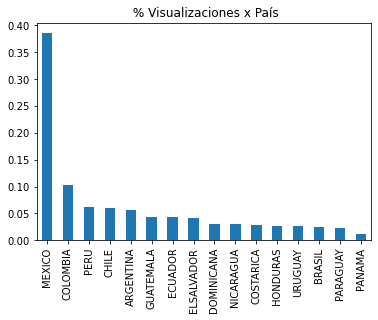

In [34]:
plot = (Visualizaciones['PAIS'].value_counts() / len(Visualizaciones['PAIS'])).plot(kind='bar', title=' % Visualizaciones x País')

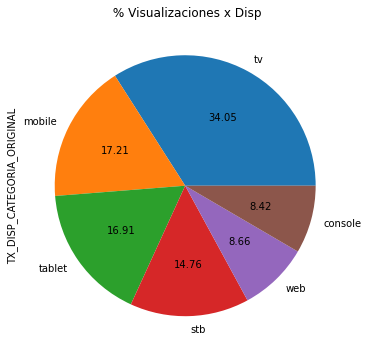

In [36]:
plot2 = Visualizaciones['TX_DISP_CATEGORIA_ORIGINAL'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), title=' % Visualizaciones x Disp')

In [48]:
pd.crosstab(index=Visualizaciones['AÑO'], columns=Visualizaciones['MES'] , margins=True)


MES,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE,All
AÑO,,,,,,,,,,,,,
2018,0,5535,6002,0,0,0,0,0,0,6234,5420,5475,28666
2019,7240,7228,8445,6095,6071,6606,7072,6671,6793,8330,7699,7987,86237
2020,0,0,0,9091,9202,0,0,0,0,0,0,0,18293
All,7240,12763,14447,15186,15273,6606,7072,6671,6793,14564,13119,13462,133196


In [45]:
pd.crosstab(index=Visualizaciones['AÑO'], columns=Visualizaciones['MES'] , margins=True).apply(lambda r: r/len(Visualizaciones) *100,
                                axis=1)

MES,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE,All
AÑO,,,,,,,,,,,,,
2018,0.000000,4.155530,4.506141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.680321,4.069191,4.110484,21.521667
2019,5.435599,5.426589,6.340280,4.575963,4.557945,4.959608,5.309469,5.008409,5.100003,6.253942,5.780204,5.996426,64.744437
2020,0.000000,0.000000,0.000000,6.825280,6.908616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.733896
All,5.435599,9.582120,10.846422,11.401243,11.466561,4.959608,5.309469,5.008409,5.100003,10.934262,9.849395,10.106910,100.000000


In [50]:
pd.crosstab(index=Visualizaciones['AÑO'], columns=Visualizaciones['MES']).apply(lambda r: r/r.sum() *100, axis=0)

MES,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE
AÑO,,,,,,,,,,,,
2018,0.0,43.367547,41.544957,0.000000,0.000000,0.0,0.0,0.0,0.0,42.804175,41.314125,40.670034
2019,100.0,56.632453,58.455043,40.135651,39.749885,100.0,100.0,100.0,100.0,57.195825,58.685875,59.329966
2020,0.0,0.000000,0.000000,59.864349,60.250115,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [16]:
Resto_KPIS = dfClaroVD[dfClaroVD['NOMBRE_METRICA'] != 'Visualizaciones']
Resto_KPIS.head()

,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
407,Bajas,20180831,COLOMBIA,HBO - Premium - 30 días,20180831.0,Móvil,20,20.0,CANCELACION DEL USUARIO,20180803.0,20180831.0,NaN,NaN,Móvil,M,NaN,Colombia,2018/08/31,2018,AGOSTO
408,Bajas,20180831,COLOMBIA,HBO - Premium - 30 días,20180831.0,Móvil,22,22.0,CANCELACION LOGICA,20180801.0,20180829.0,NaN,NaN,Móvil,M,NaN,Colombia,2018/08/31,2018,AGOSTO
409,Bajas,20180831,COSTARICA,Claro video - Premium - 30 días,20180831.0,Fija,8,8.0,CANCELACION DESDE ADMIN,20180803.0,20180830.0,NaN,NaN,Fija,M,NaN,Costa Rica,2018/08/31,2018,AGOSTO
410,Bajas,20180831,COSTARICA,CRACKLE - Premium - 30 días,20180831.0,Móvil,7,7.0,CANCELACION DEL USUARIO,20180801.0,20180828.0,NaN,NaN,Móvil,M,NaN,Costa Rica,2018/08/31,2018,AGOSTO
411,Bajas,20180831,COSTARICA,CRACKLE - Premium - 30 días,20180831.0,Móvil,3,3.0,CANCELACION LOGICA,20180808.0,20180823.0,NaN,NaN,Móvil,M,NaN,Costa Rica,2018/08/31,2018,AGOSTO


In [20]:
Resto_KPIS.shape

(28159, 20)

In [ ]:
#link https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/